## Ejercicio 7

Utilizando los atributos numéricos del archivo Autos.csv entrene un combinador lineal para predecir el
precio del auto en función del resto de los atributos. Tenga en cuenta la existencia de valores faltantes.
Realice varias ejecuciones y observe los vectores de pesos obtenidos. ¿Puede identificar cuáles son los
atributos con mayor incidencia en la determinación del precio? Explique.

In [1]:
import pandas as pd

ALPHA	= 0.01
MAX_ITE = 200
COTA	= 10e-3

DATOS_DIR   = '../../Datos/'
data = pd.read_csv(DATOS_DIR + 'autos.csv')

##### Preprocesamiento de los datos

In [ ]:
import numpy as np
data.dtypes
data["price"] = pd.to_numeric(data["price"], errors="coerce")
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.isnull().sum()
numeric_data = numeric_data.fillna(numeric_data.mean())

##### Entrenamiento

Normalización: MinMaxScaler


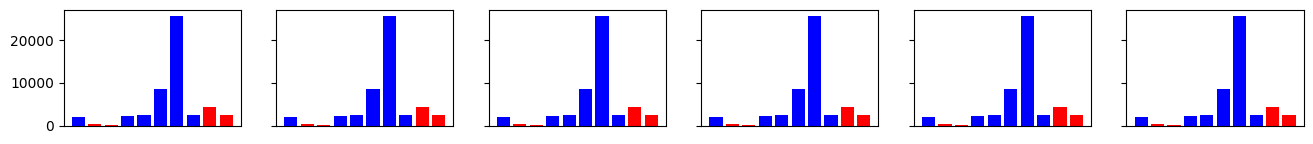

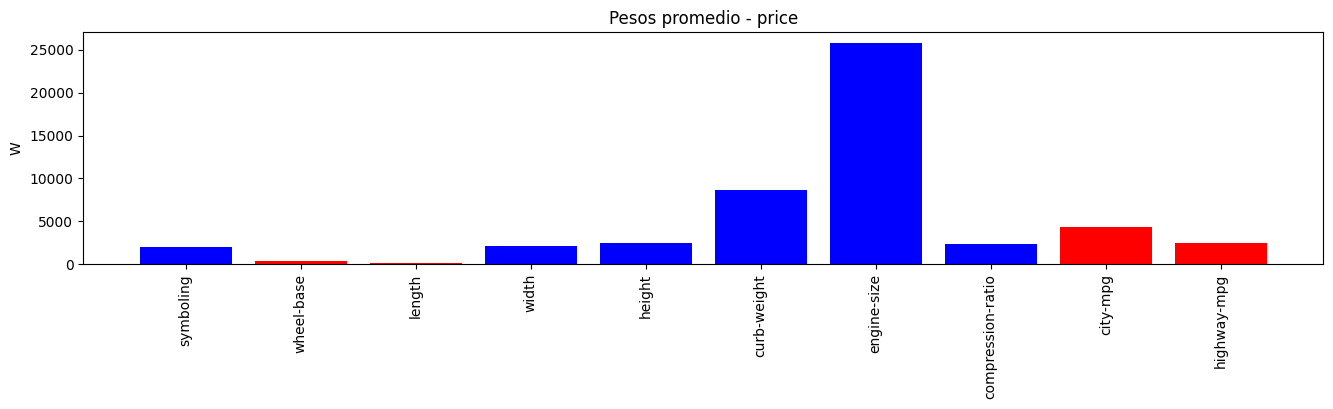

           Attribute  Mean weight (abs)
0        engine-size       25758.119393
1        curb-weight        8660.725799
2           city-mpg        4399.513876
3             height        2479.777700
4        highway-mpg        2456.488889
5  compression-ratio        2383.453250
6              width        2170.044414
7          symboling        2041.923385
8         wheel-base         350.925454
9             length         190.197366


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Fuentes.ClassNeuronaGral import NeuronaGradiente
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def compute_and_plot_weights(df, alpha=0.05, max_iter=200, cota=1e-3, n_runs=6, scaler_class=MinMaxScaler):
    """
    Calcula y grafica los pesos promedio de una neurona lineal para el target 'price'.
    """
    # Hardcodeamos la columna target
    target_idx = df.columns.get_loc("price")  # índice de la columna 'price'

    Ejemplos = df.to_numpy()
    T = Ejemplos[:, target_idx].reshape(-1, 1)
    X = np.delete(Ejemplos, target_idx, axis=1)

    nomPred = df.columns[target_idx]
    nomCols = np.delete(df.columns, target_idx)

    # Escalado
    if scaler_class is None:
        X_scaled = X
    else:
        scaler = scaler_class()
        X_scaled = scaler.fit_transform(X)

    w_acc = np.zeros(len(nomCols))
    fig, subs = plt.subplots(1, n_runs, sharex='col', sharey='row', figsize=(16, 1.5))
    if n_runs == 1:
        subs = [subs]

    print(f'Normalización: {scaler_class.__name__ if scaler_class else "None"}')

    # Entrenamiento múltiple y gráficos individuales
    for i in range(n_runs):
        modelo = NeuronaGradiente(alpha=alpha, n_iter=max_iter, cotaE=cota, FUN="linear")
        modelo.fit(X_scaled, T)
        w_acc += modelo.w_

        colores = ['blue' if v >= 0 else 'red' for v in modelo.w_]
        subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
        subs[i].set_xticks([])

    # Pesos promedio
    w_prom = w_acc / n_runs
    w_prom_list = w_prom.tolist()

    # Gráfico final de pesos promedio
    colores = ['blue' if v >= 0 else 'red' for v in w_prom]
    plt.figure(figsize=(16, 4))
    barras = np.abs(w_prom)
    N = len(barras)
    plt.bar(np.arange(N), barras, color=colores)
    plt.title(f"Pesos promedio - {nomPred}")
    plt.ylabel('W')
    plt.xticks(np.arange(N), nomCols, rotation='vertical')
    plt.subplots_adjust(bottom=0.3)
    plt.show()

    # DataFrame de pesos promedio absolutos
    weight_df = pd.DataFrame({
        "Attribute": nomCols,
        "Mean weight (abs)": np.abs(w_prom)
    }).sort_values(by="Mean weight (abs)", ascending=False).reset_index(drop=True)

    return weight_df, w_prom_list

df_weights, w_list = compute_and_plot_weights(numeric_data,
                                            alpha=ALPHA, max_iter=MAX_ITE,
                                            cota=COTA, n_runs=6,
                                            scaler_class=MinMaxScaler)
print(df_weights)

Normalización: StandardScaler


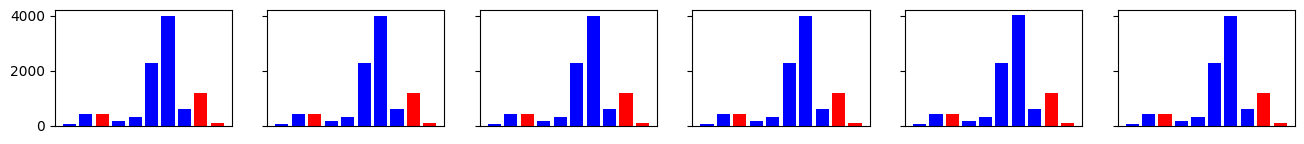

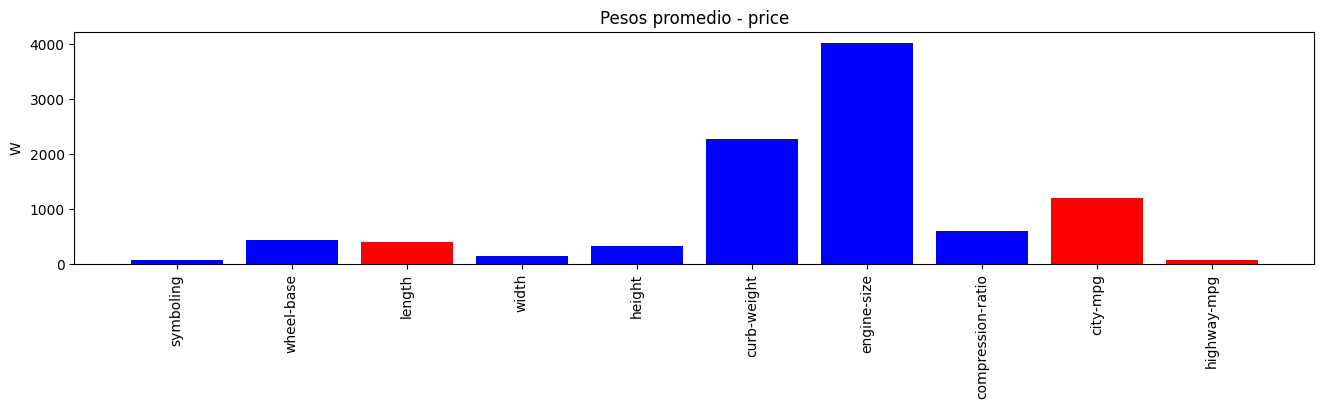

           Attribute  Mean weight (abs)
0        engine-size        4015.570218
1        curb-weight        2284.242041
2           city-mpg        1197.841521
3  compression-ratio         598.478004
4         wheel-base         434.628187
5             length         402.356366
6             height         327.555040
7              width         147.771855
8        highway-mpg          75.190070
9          symboling          72.659805


In [17]:
df_weights_std, w_list_std = compute_and_plot_weights(numeric_data,
                                                    alpha=ALPHA, max_iter=MAX_ITE,
                                                    cota=COTA, n_runs=6,
                                                    scaler_class=StandardScaler)
print(df_weights_std)

> **Conclusión:** Los atributos más relevantes son:
> - engine-size.
> - curb-weight.
> - city-mpg.